In [18]:
import pandas as pd
from datetime import date, timedelta
import numpy as np
import matplotlib.pyplot as plt

<Axes: >

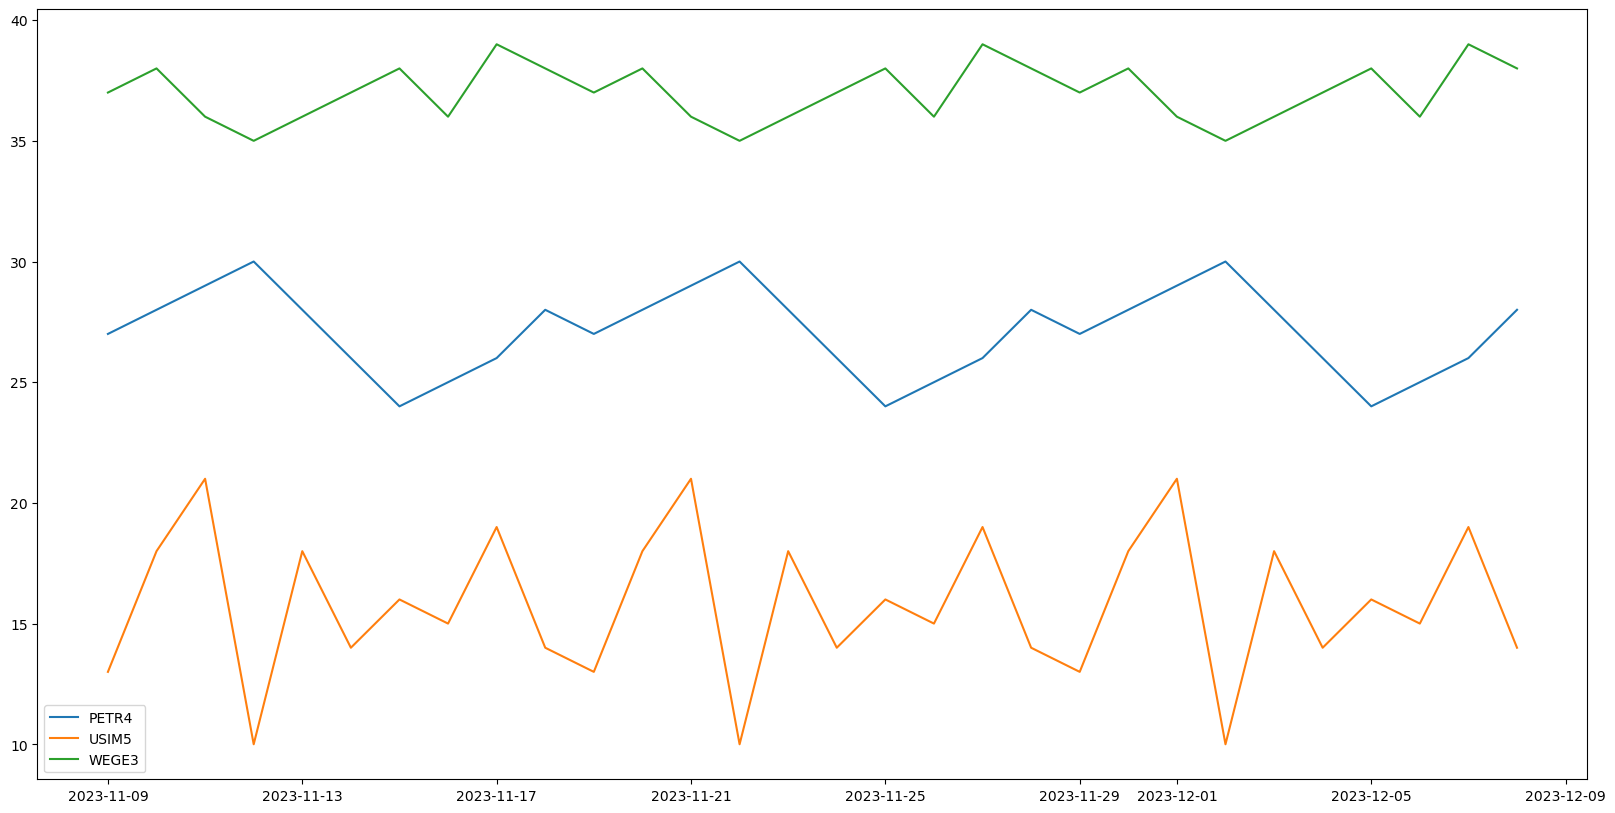

In [19]:
dict2 = {'PETR4':[27,28,29,30,28,26,24,25,26,28,27,28,29,30,28,26,24,25,26,28,27,28,29,30,28,26,24,25,26,28],
        'USIM5':[13,18,21,10,18,14,16,15,19,14,13,18,21,10,18,14,16,15,19,14,13,18,21,10,18,14,16,15,19,14],
        'WEGE3':[37,38,36,35,36,37,38,36,39,38,37,38,36,35,36,37,38,36,39,38,37,38,36,35,36,37,38,36,39,38]}

data_inicial = date.today()

datas = [data_inicial + timedelta(days = i) for i in range(30)]

df = pd.DataFrame(dict2, index = datas)

df.plot(figsize = (20,10))

array([[<Axes: title={'center': 'PETR4'}>,
        <Axes: title={'center': 'USIM5'}>],
       [<Axes: title={'center': 'WEGE3'}>, <Axes: >]], dtype=object)

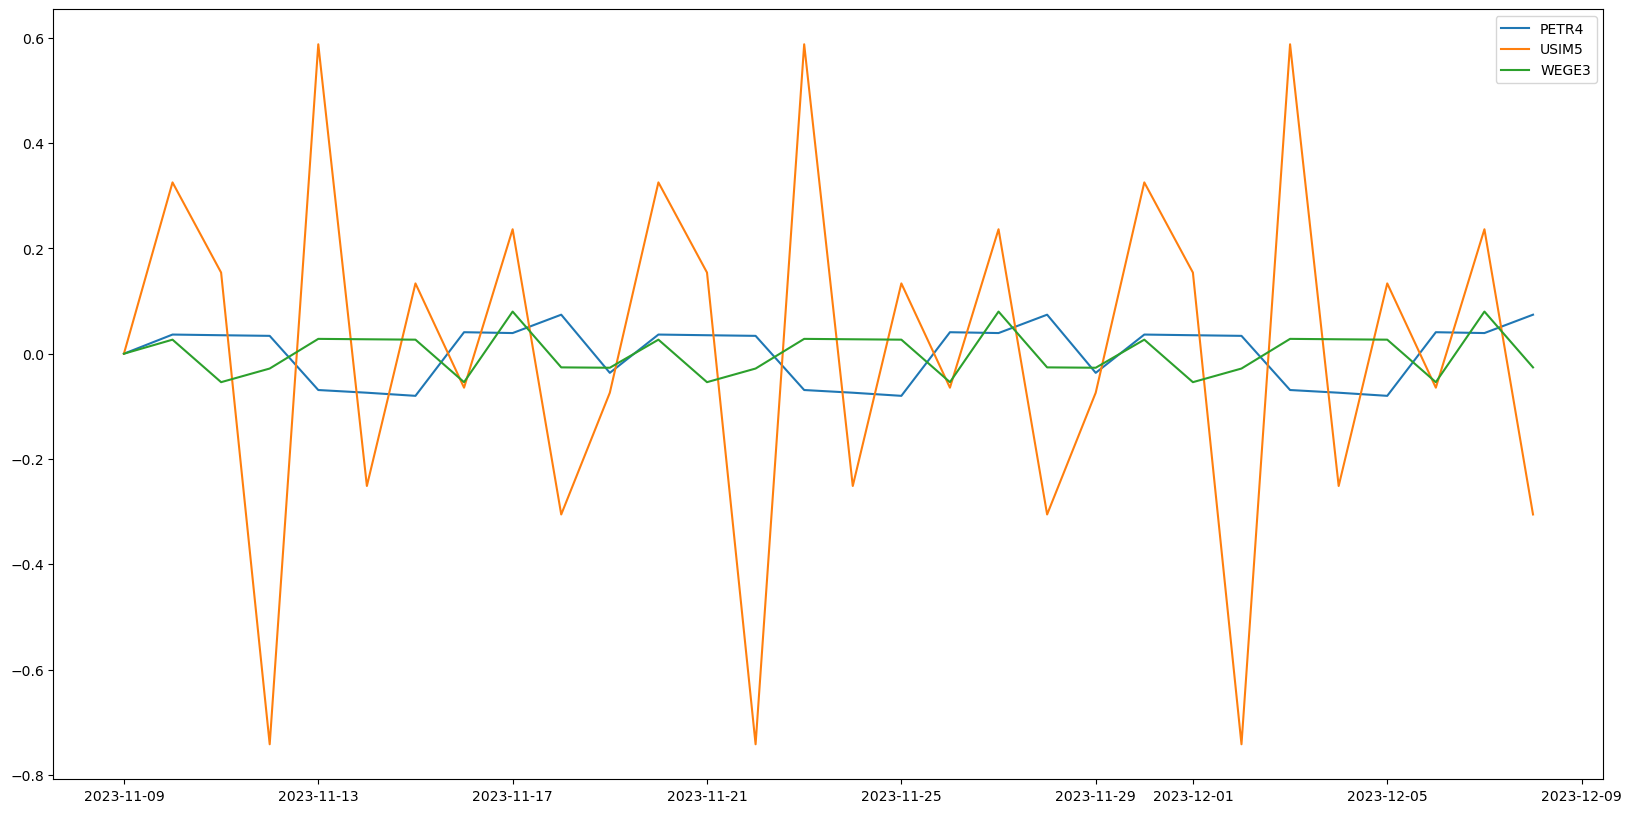

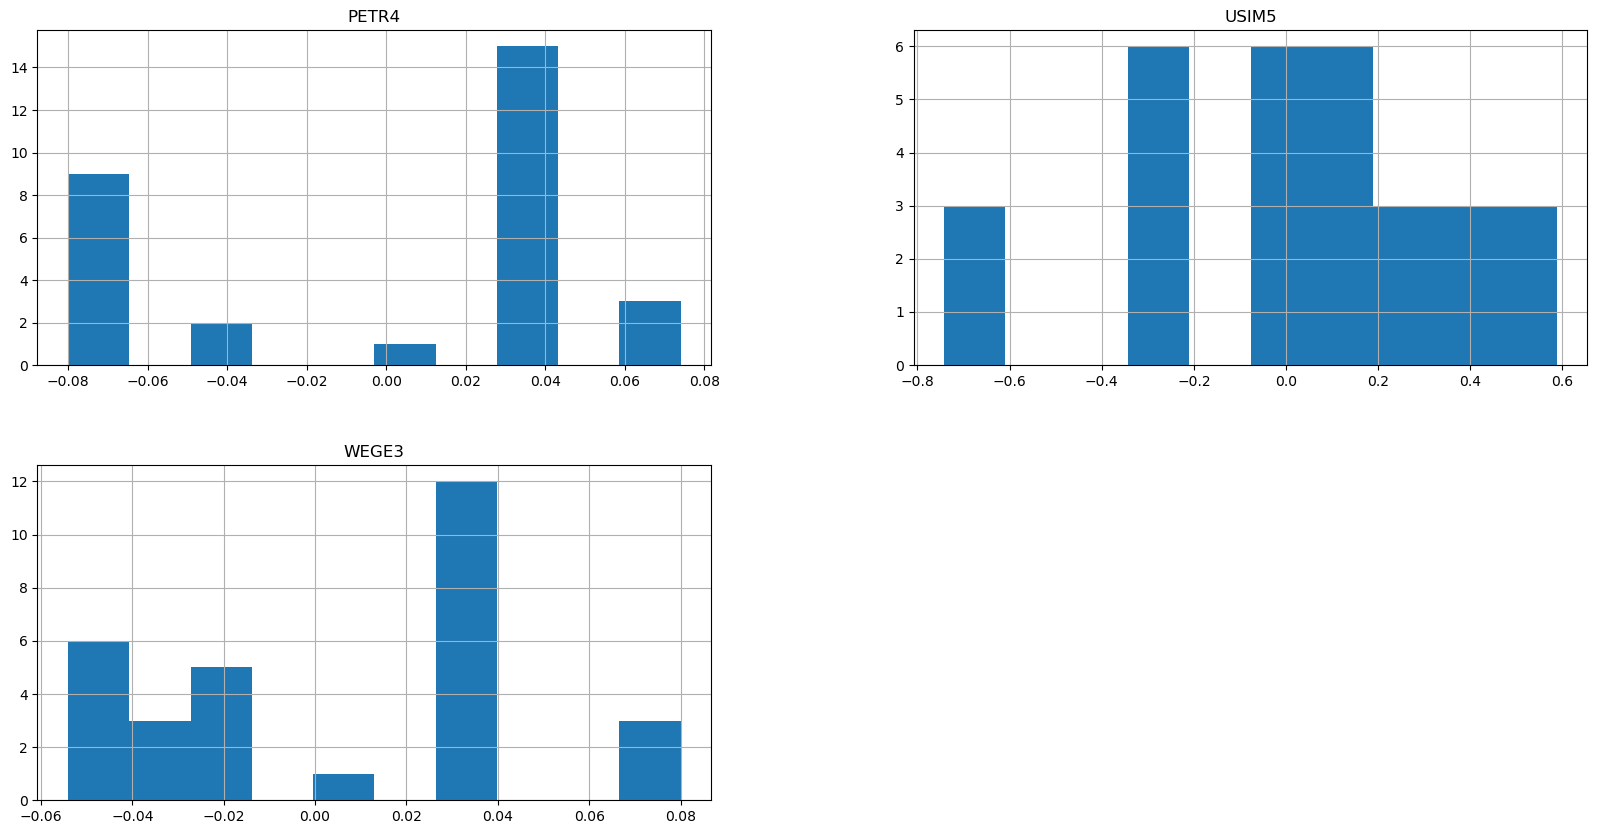

In [20]:
df_log_returns = np.log(df / df.shift(1)).fillna(0)
df_log_returns.plot(figsize = (20,10))
df_log_returns.hist(figsize = (20,10))

Text(0.5, 0.98, 'Meu primeiro estudo')

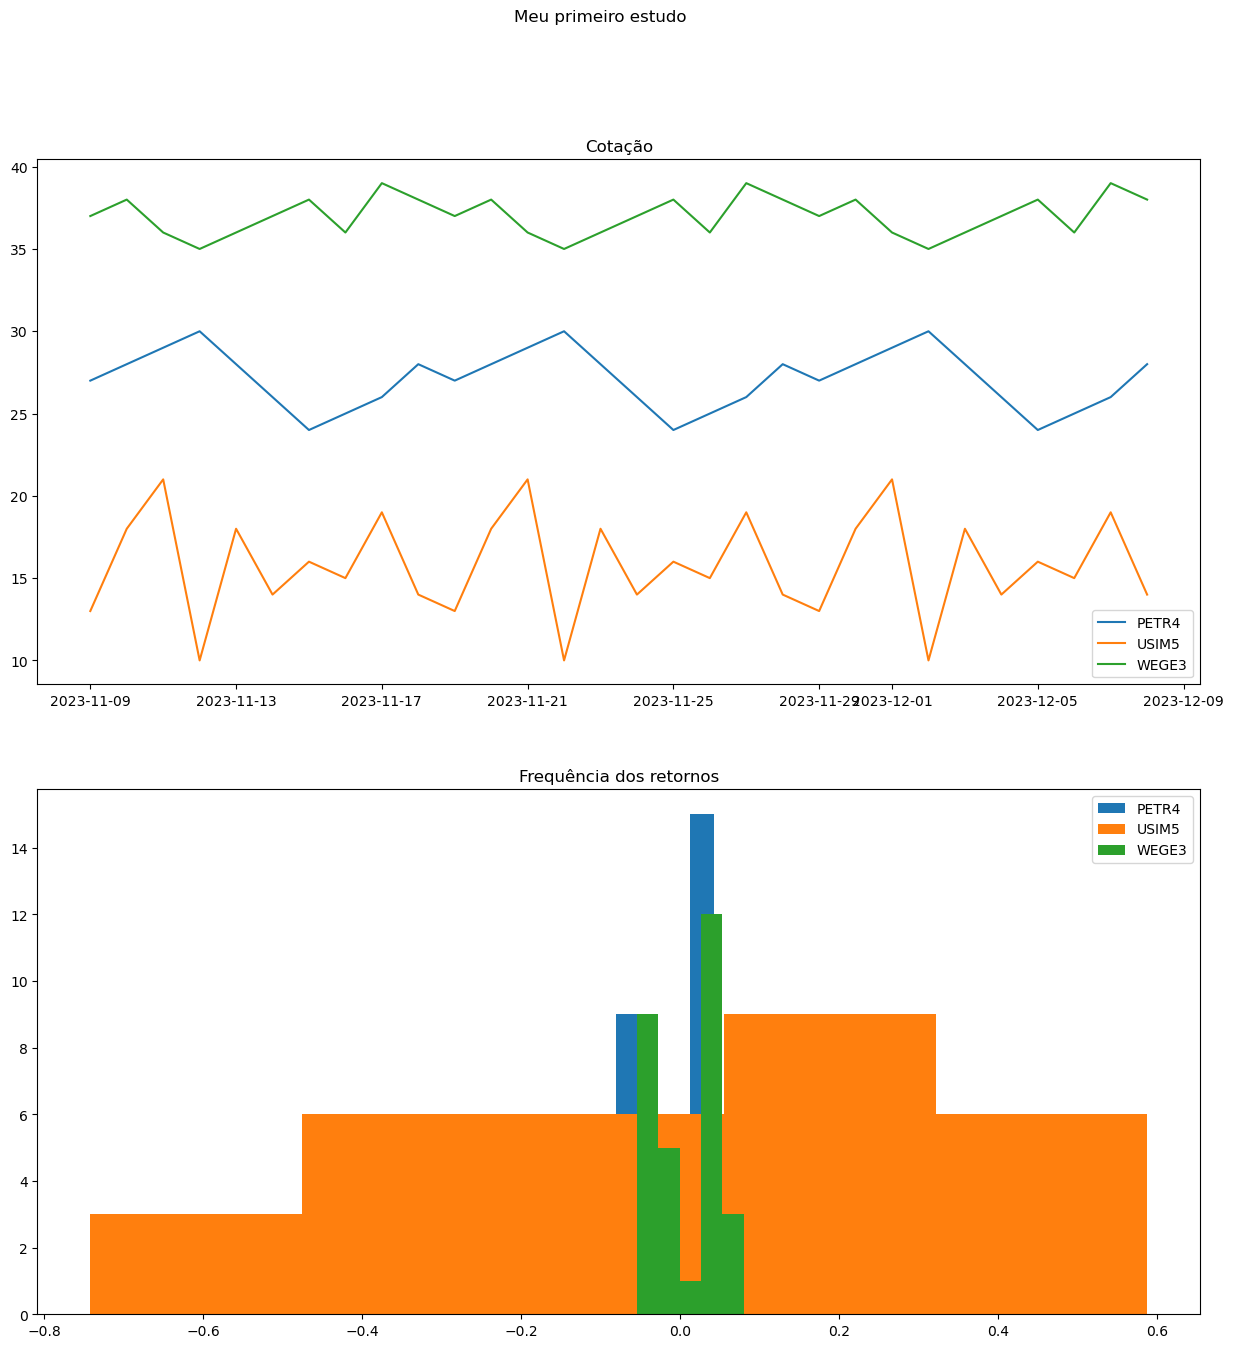

In [21]:
fig, [ax1,ax2] = plt.subplots(2,1, figsize = (15,15))

lista_ativos_df = list(df.keys())

for i in lista_ativos_df:
    ax1.plot(datas,df[i])
    ax2.hist(df_log_returns[i],bins = 5)

ax1.legend(lista_ativos_df)
ax2.legend(lista_ativos_df)

ax1.set_title('Cotação')
ax2.set_title('Frequência dos retornos')

fig.suptitle('Meu primeiro estudo')

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime,timedelta
import yfinance as yf

In [23]:
chamada_api = yf.Ticker('PETR4.SA').history(period='36mo')

In [24]:
chamada_api

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-11-09 00:00:00-03:00,8.068374,8.672260,8.041620,8.259478,164904100,0.0,0.0
2020-11-10 00:00:00-03:00,8.366495,8.848075,8.335918,8.821321,163732600,0.0,0.0
2020-11-11 00:00:00-03:00,8.924517,8.928339,8.561421,8.744880,93072900,0.0,0.0
2020-11-12 00:00:00-03:00,8.691371,8.721947,8.320631,8.374140,77275000,0.0,0.0
2020-11-13 00:00:00-03:00,8.416183,8.714303,8.366496,8.649328,66065200,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-03 00:00:00-03:00,35.790001,35.889999,35.049999,35.540001,30959700,0.0,0.0
2023-11-06 00:00:00-03:00,35.740002,36.130001,35.509998,35.509998,33583600,0.0,0.0
2023-11-07 00:00:00-03:00,35.070000,35.419998,34.660000,34.919998,48919900,0.0,0.0


In [25]:
symbol_list = ['PETR4.SA','USIM5.SA','CSNA3.SA','SBSP3.SA']

df1 = pd.DataFrame()
contador = 0
datas = []
for ativo in symbol_list:
    chamada_api = yf.Ticker(ativo).history(period='36mo')
    closes = chamada_api['Close'].values
    df1[ativo] = closes
    if contador == 0:
        contador += 1
        datas.append(list(chamada_api.index))

df1['Datas'] = datas[0]
df1 = df1.set_index('Datas', drop=True)
df1

,PETR4.SA,USIM5.SA,CSNA3.SA,SBSP3.SA
Datas,,,,
2020-11-09 00:00:00-03:00,8.259477,9.509495,16.390572,43.834217
2020-11-10 00:00:00-03:00,8.821320,9.141817,15.655147,44.107887
2020-11-11 00:00:00-03:00,8.744880,9.033185,15.608205,43.739845
2020-11-12 00:00:00-03:00,8.374139,9.024829,15.271790,42.229954
2020-11-13 00:00:00-03:00,8.649326,9.125104,15.091844,42.088394
...,...,...,...,...
2023-11-03 00:00:00-03:00,35.540001,6.870000,12.670000,60.889999
2023-11-06 00:00:00-03:00,35.509998,6.820000,12.680000,60.599998
2023-11-07 00:00:00-03:00,34.919998,6.810000,12.700000,61.099998


<Axes: xlabel='Datas'>

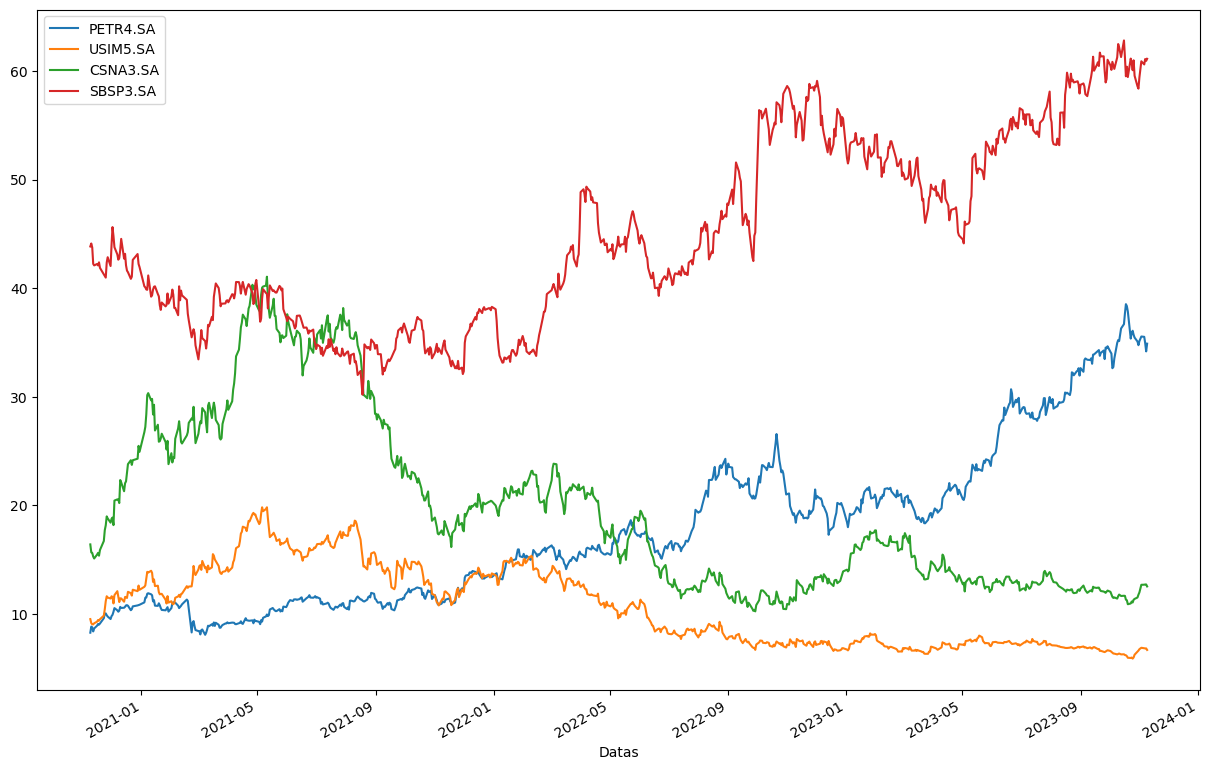

In [26]:
df1.plot(figsize = (15,10))

In [27]:
df1_log_returns = np.log(df1 / df1.shift(1)).fillna(0)
df1_log_returns.describe()

,PETR4.SA,USIM5.SA,CSNA3.SA,SBSP3.SA
count,747.000000,747.000000,747.000000,747.000000
mean,0.001928,-0.000475,-0.000361,0.000445
std,0.025304,0.027701,0.031161,0.020644
min,-0.232056,-0.078358,-0.086298,-0.067191
25%,-0.010862,-0.015277,-0.018134,-0.011628
50%,0.002233,-0.001579,-0.001398,0.000178
75%,0.015981,0.013740,0.017751,0.011768
max,0.104622,0.100541,0.155340,0.156452


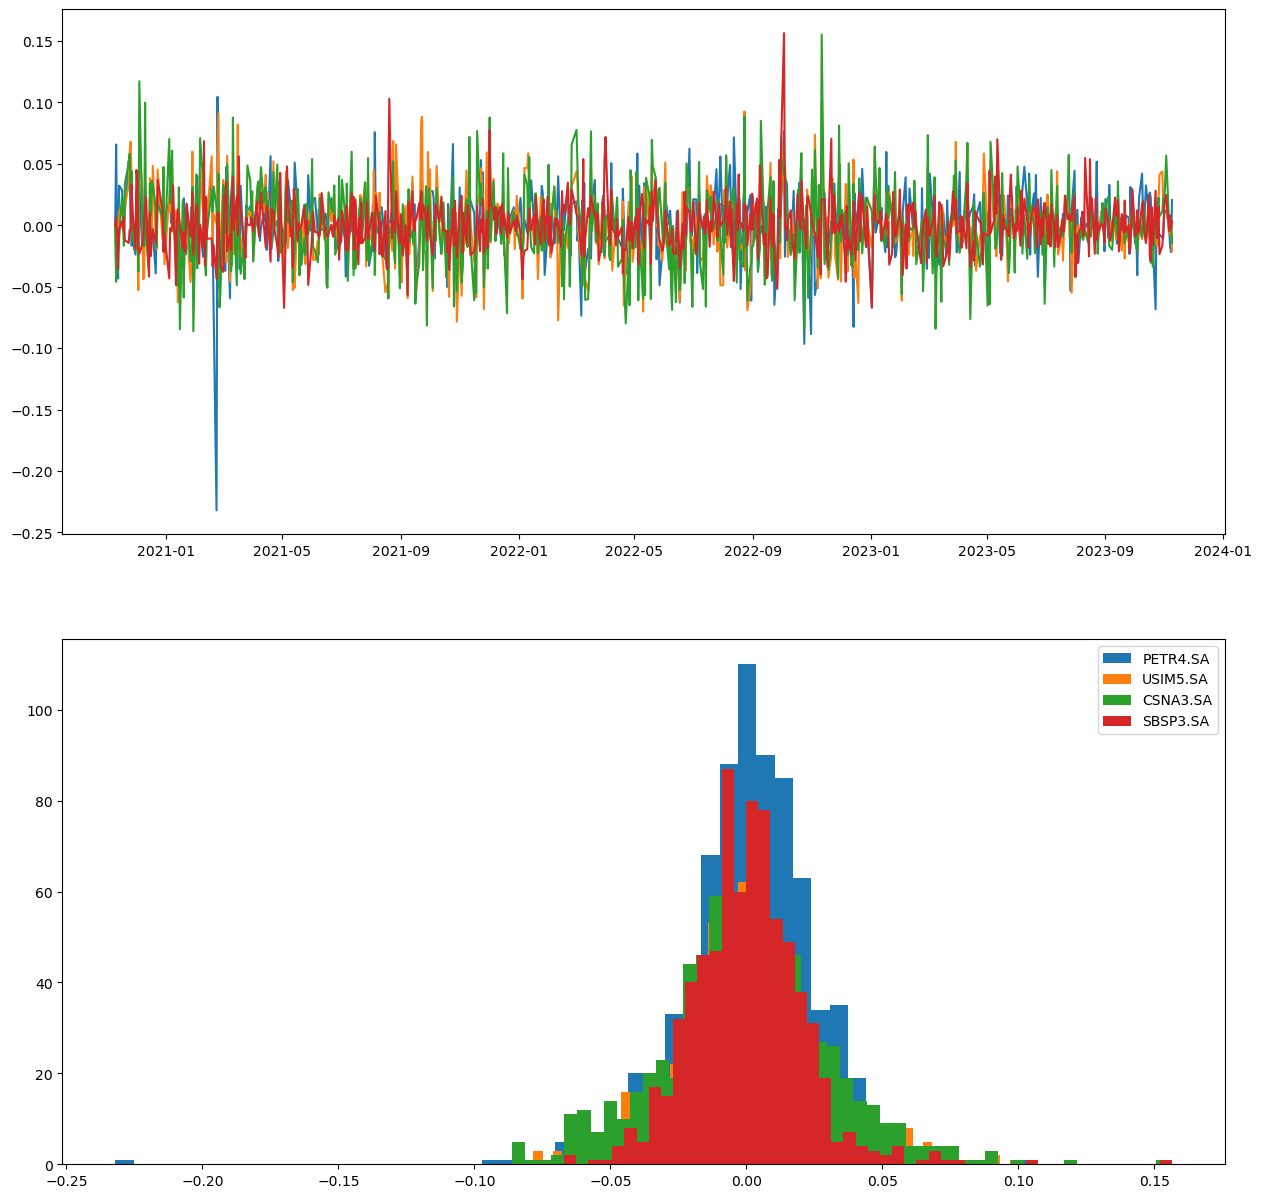

In [28]:
fig2, [ax1,ax2] = plt.subplots(2,1, figsize = (15,15))

for ativo in symbol_list:
    ax1.plot(datas[0],df1_log_returns[ativo].values)
    ax2.hist(df1_log_returns[ativo].values,bins = 50)

ax2.legend(symbol_list)
plt.show()